In [1]:
import pandas as pd
df=pd.read_csv('Olympics.csv')
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


# **Summer Olympics Data Analysis Assignment**
 **1. In how many cities Summer Olympics is held so far?**

In [2]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [3]:
len(df['City'].unique())

22

**2.Which sport is having most number of Gold Medals so far?(Top 5)**

In [4]:
pd.get_dummies(df['Medal'])
data=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [5]:
data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0,1,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,0,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,0,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,0,1,0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,1,0,0
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,0,1,0
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,0,0,1
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,1,0,0


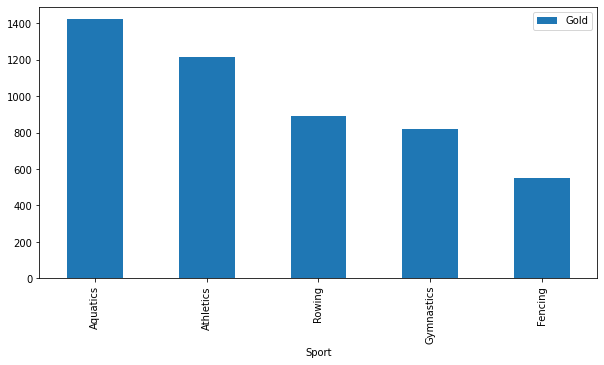

In [6]:
data.groupby('Sport').sum()[['Gold']].sort_values('Gold',ascending=False).head().plot.bar(figsize=(10,5))

**3.Which sport is having most number of medals so far?(Top 5)**

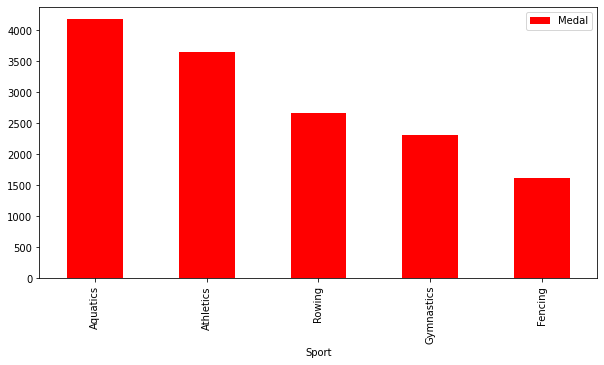

In [7]:
data=[]
for Sport in df['Sport'].unique():
  data.append([Sport,len(df[df['Sport']==Sport])])
pd.DataFrame(data,columns=['Sport','Medal']).sort_values(by='Medal',ascending=False).head().plot(x='Sport',y='Medal',kind='bar',color='red',figsize=(10,5))

**4.Which player has won most number of medals? (Top 5)**

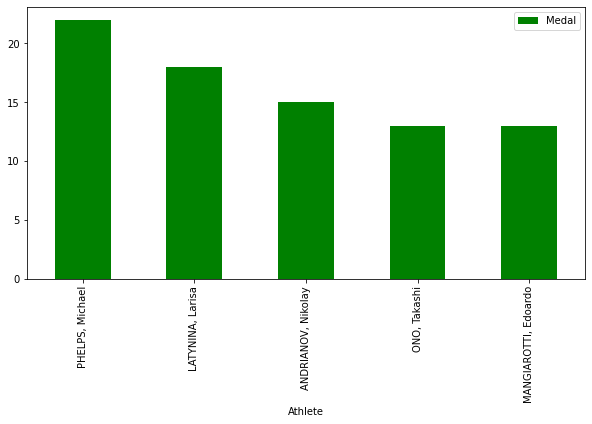

In [8]:
data=[]
for Athlete in df['Athlete'].unique():
  data.append([Athlete,len(df[df['Athlete']==Athlete])])
pd.DataFrame(data,columns=['Athlete','Medal']).sort_values(by='Medal',ascending=False).head().plot(x='Athlete',y='Medal',kind='bar',color='green',figsize=(10,5))

**5.Which player has won most number Gold medals of medals? (Top 5)**

In [9]:
pd.get_dummies(df['Medal'])
data=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [10]:
data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0,1,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,0,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,0,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,0,1,0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,1,0,0
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,0,1,0
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,0,0,1
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,1,0,0


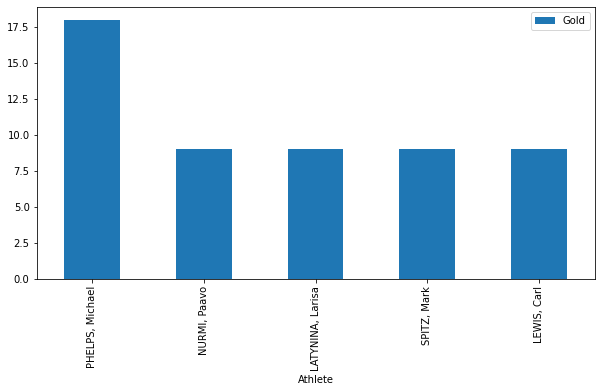

In [11]:
data.groupby('Athlete').sum()[['Gold']].sort_values('Gold',ascending=False).head().plot.bar(figsize=(10,5))

**6.In which year India won first Gold Medal in Summer Olympics?**

In [12]:
df[(df['Country']=='IND') & (df['Medal']=='Gold')].head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


**7.Which event is most popular in terms on number of players? (Top 5)**

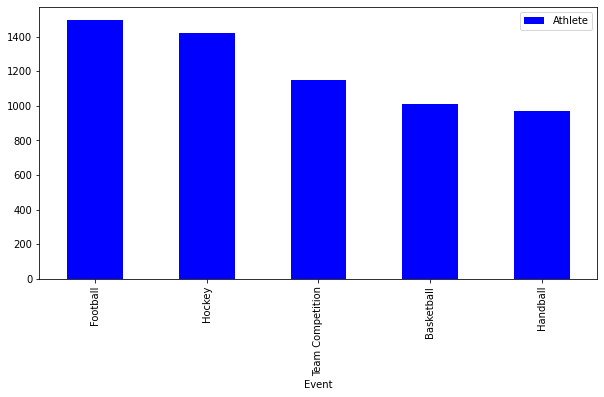

In [13]:
data=[]
for Event in df['Event'].unique():
  data.append([Event,len(df[df['Event']==Event])])
pd.DataFrame(data,columns=['Event','Athlete']).sort_values(by='Athlete',ascending=False).head().plot(x='Event',y='Athlete',kind='bar',color='blue',figsize=(10,5))

**8.Which sport is having most female Gold Medalists? (Top 5)**

In [15]:
d=df[df['Medal']=='Gold']
F=d[d['Gender']=='Women']

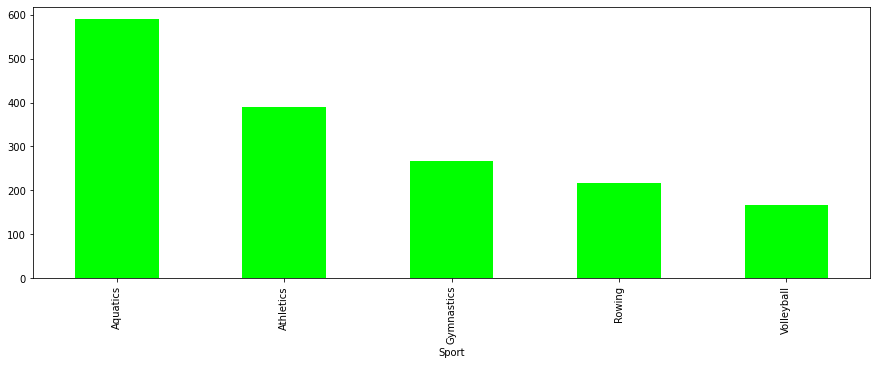

In [16]:
F.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(color='lime',figsize=(15,5))